In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'darkgrid',font_scale=1.5)

import warnings as ws
ws.filterwarnings('ignore')

In [17]:
# Displaying all the columns
pd.pandas.set_option('display.max_columns',None)

In [18]:
# Reading the file
df = pd.read_csv('mobiles_for_eda.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [19]:
df.head()

,brand,ram_gb,storage_gb,expandable_storage,battery_type,battery_mah,rear_camera_mp,front_camera_mp,rear_camera_count,rating,reviews,price,display_inch,processor_family,warranty_months
0,Redmi,4 GB RAM,64 GB ROM,Expandable Upto 512 GB,standard battery,5000.0,14,8.0,2,4.4,55078.0,9999,6.22,Snapdragon,12.0
1,Realme,4 GB RAM,64 GB ROM,NaN,standard battery,5000.0,24,8.0,4,4.5,20062.0,10999,6.52,Snapdragon,NaN
2,Realme,4 GB RAM,128 GB ROM,NaN,standard battery,5000.0,24,8.0,4,4.5,20062.0,11999,6.52,Snapdragon,NaN
3,Realme,4 GB RAM,128 GB ROM,NaN,standard battery,5000.0,24,8.0,4,4.5,20062.0,11999,6.52,Snapdragon,NaN
4,Realme,3 GB RAM,32 GB ROM,Expandable Upto 256 GB,standard battery,4000.0,15,5.0,2,4.4,10091.0,7499,6.10,Mediatek,NaN


In [20]:
df.columns

Index(['brand', 'ram_gb', 'storage_gb', 'expandable_storage', 'battery_type',
       'battery_mah', 'rear_camera_mp', 'front_camera_mp', 'rear_camera_count',
       'rating', 'reviews', 'price', 'display_inch', 'processor_family',
       'warranty_months'],
      dtype='object')

### Total price contribution by brand

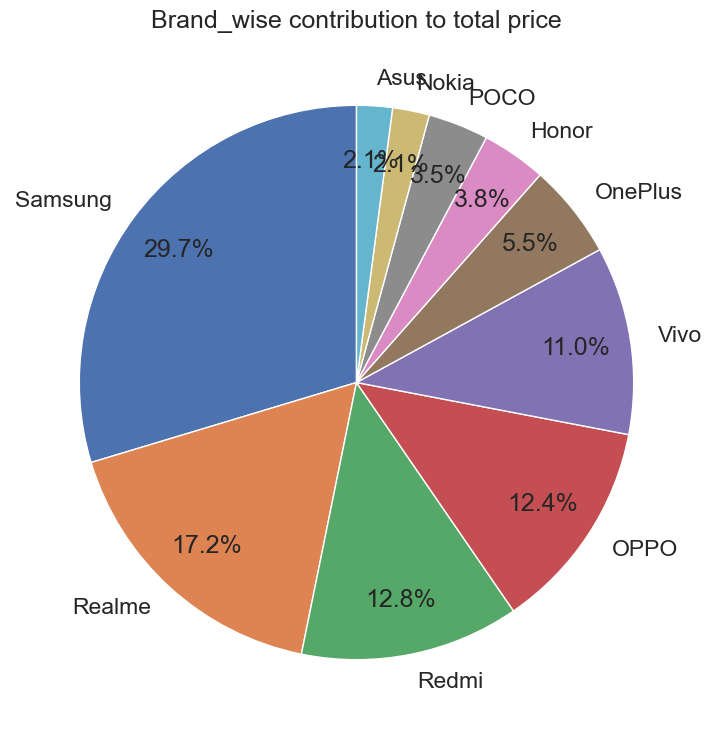

In [21]:
brand_price = df.groupby('brand')['price'].sum()

# top10 brands
top_10_brands = brand_price.sort_values(ascending=False).head(10)

# Plotting pie chart
plt.figure(figsize = (9,9))
top_10_brands.plot.pie(autopct='%1.1f%%',startangle=90,pctdistance=0.8,labeldistance=1.1)
plt.title('Brand_wise contribution to total price')
plt.ylabel('')
plt.show()

In [22]:
def top_10_price_contr(feature):
    data = (
        df.groupby(feature)['price'].sum()
        .sort_values(ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10,6))
    data.plot(
        kind='bar',
        color = plt.cm.tab10(range(len(data)))
    )

    plt.title(f'Top 10 {feature} by Total Price Contribution')
    plt.xlabel(feature)
    plt.ylabel('Total_Price')
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

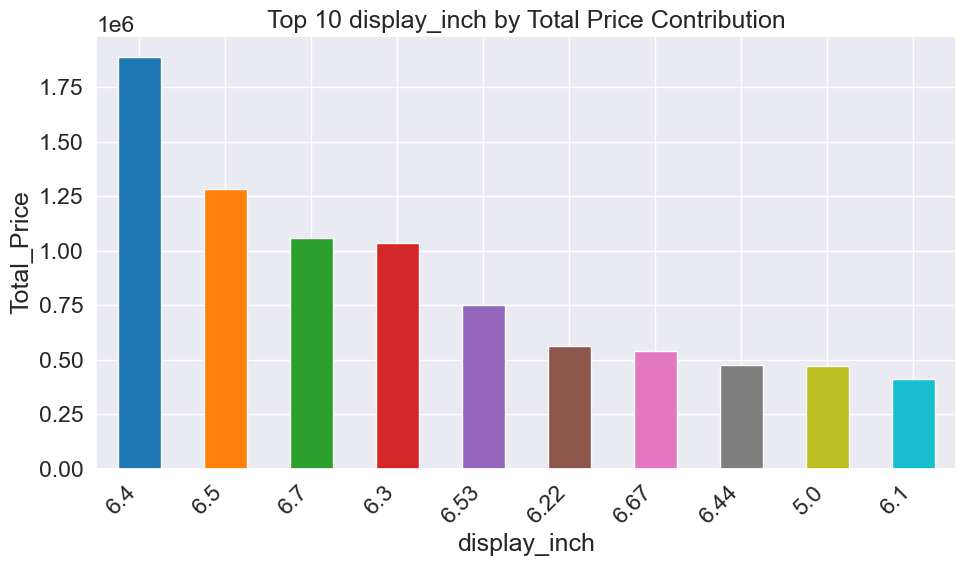

In [23]:
top_10_price_contr('display_inch')

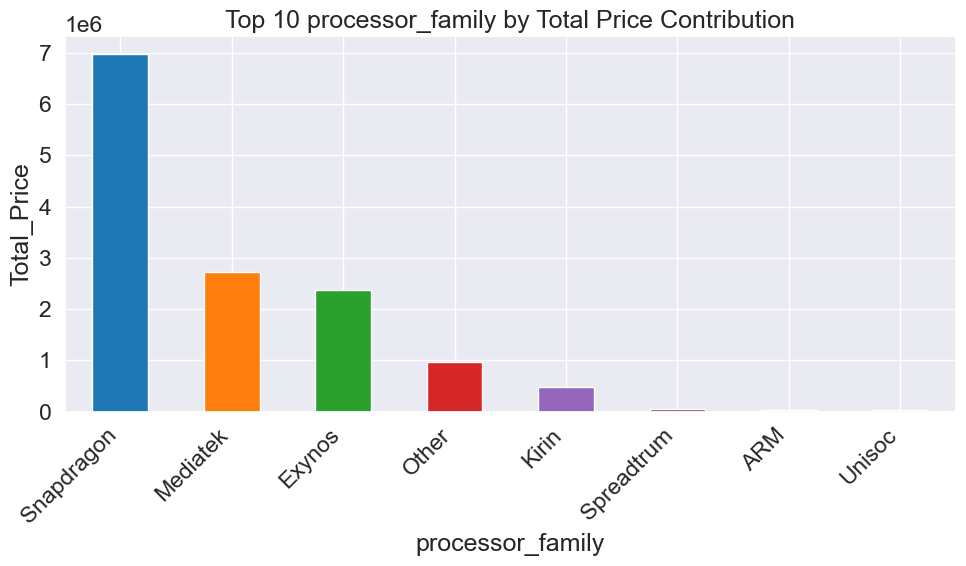

In [24]:
top_10_price_contr('processor_family')

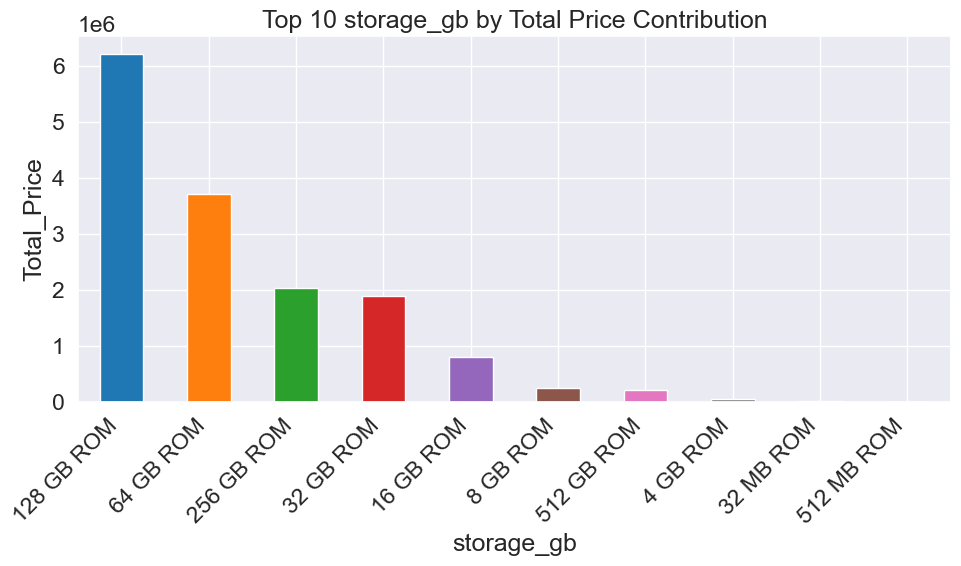

In [25]:
top_10_price_contr('storage_gb')

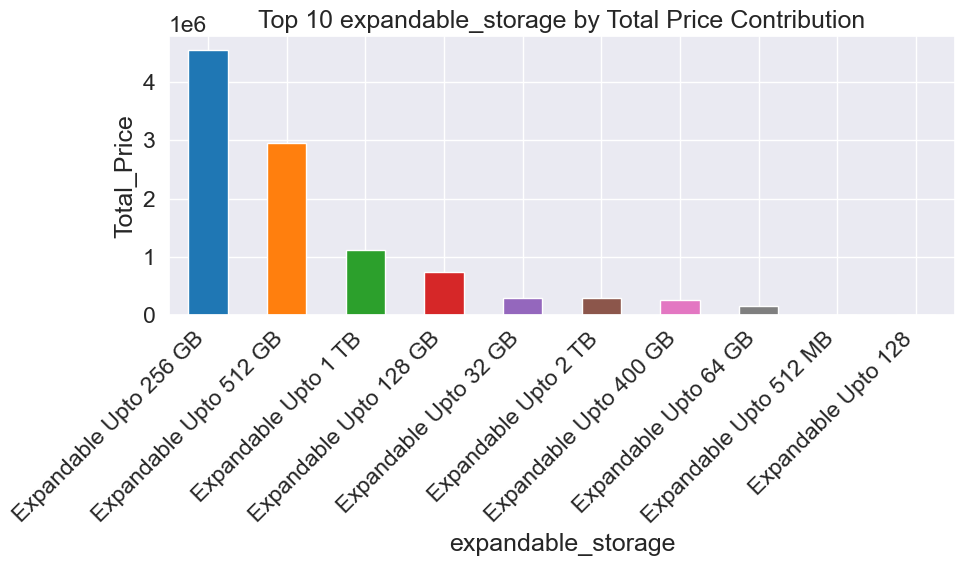

In [26]:
top_10_price_contr('expandable_storage')

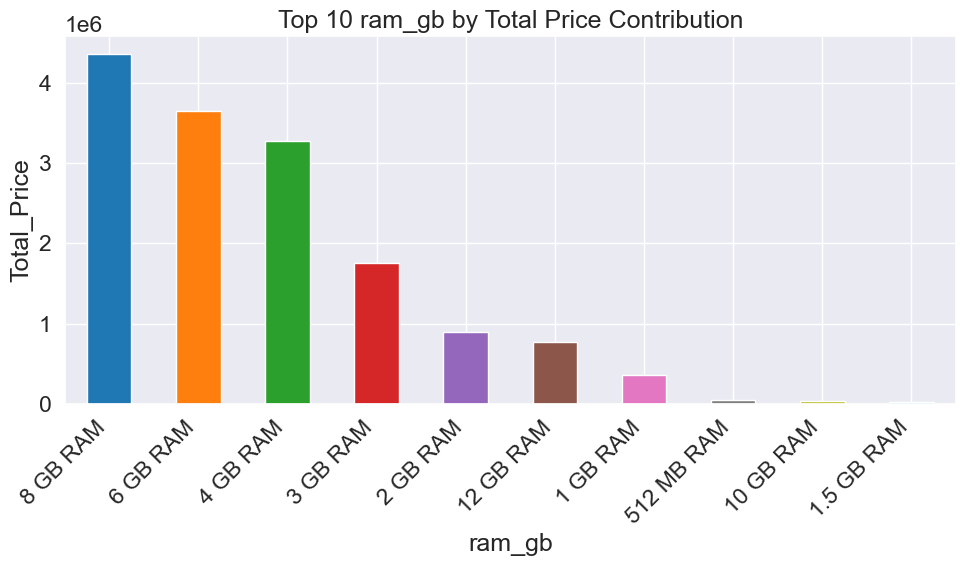

In [27]:
top_10_price_contr('ram_gb')

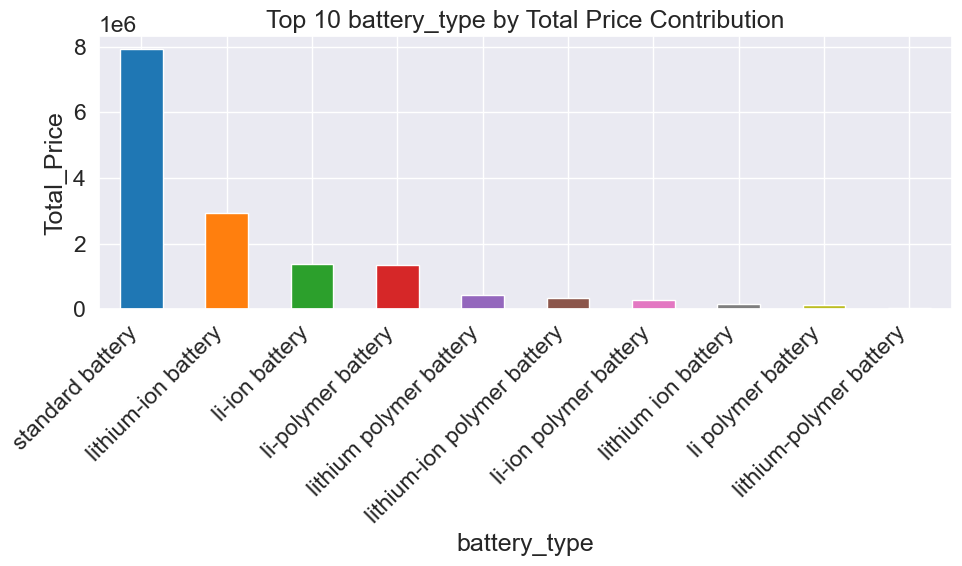

In [28]:
top_10_price_contr('battery_type')

In [29]:
features_with_nan = [feature for feature in df.columns if df[feature].isna().sum() > 0]
for feature in features_with_nan:
    print(f'{feature} : {df[feature].isna().sum()}')
print('-----------------------------------------------------------------------')
for feature in features_with_nan:
    print(f'{feature} : {round(df[feature].isna().mean(),4)}% missing values')

expandable_storage : 249
front_camera_mp : 92
rating : 13
reviews : 13
processor_family : 149
warranty_months : 209
-----------------------------------------------------------------------
expandable_storage : 0.253% missing values
front_camera_mp : 0.0935% missing values
rating : 0.0132% missing values
reviews : 0.0132% missing values
processor_family : 0.1514% missing values
warranty_months : 0.2124% missing values


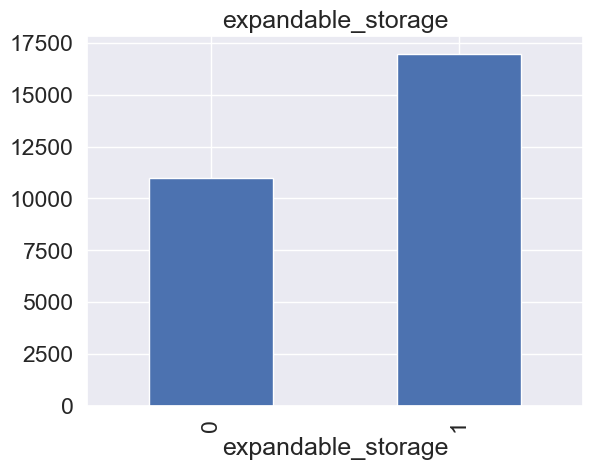

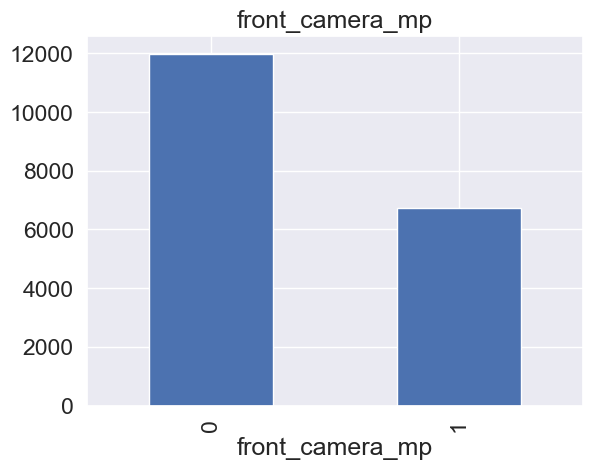

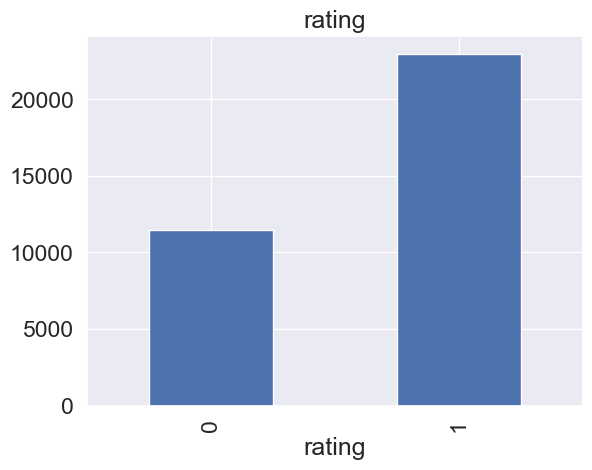

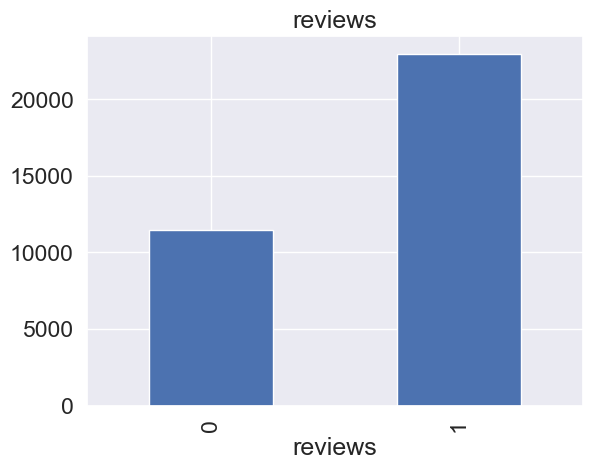

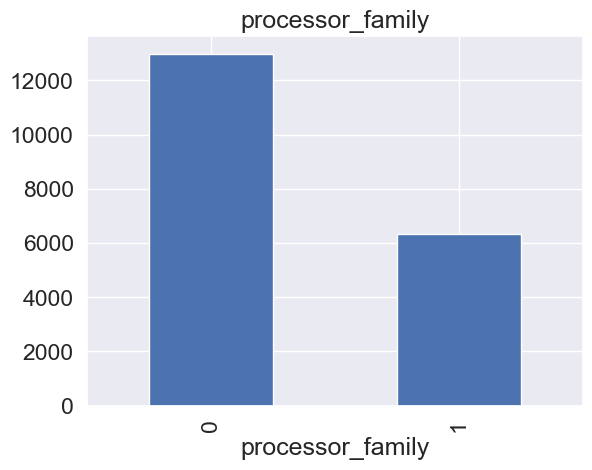

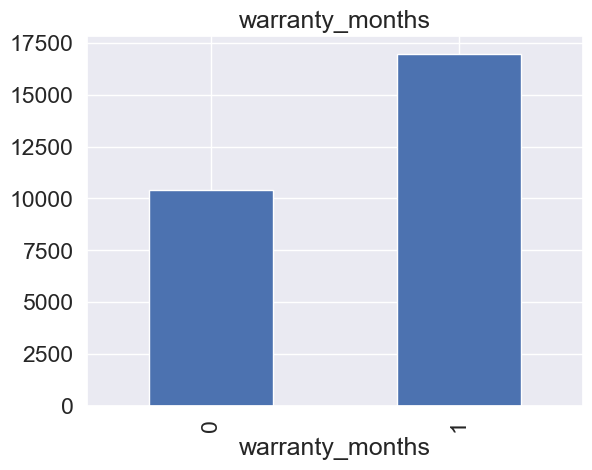

In [30]:
# We need to find the relationship b/w missing values and dependent variable
for feature in features_with_nan:
    data = df.copy()

    data[feature] = np.where(data[feature].isna(),1,0)

    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Numerical Features

In [31]:
numerical_features = [feature for feature in df.columns if df[feature].dtype in ['int64','float64']]
print(f'No_of_numerical_features : {len(numerical_features)}')

No_of_numerical_features : 9


In [32]:
numerical_features

['battery_mah',
 'rear_camera_mp',
 'front_camera_mp',
 'rear_camera_count',
 'rating',
 'reviews',
 'price',
 'display_inch',
 'warranty_months']

## Numerical_Features(Discrete)

In [33]:
discrete_var = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print(f'No_of_discrete_var : {len(discrete_var)}')

No_of_discrete_var : 4


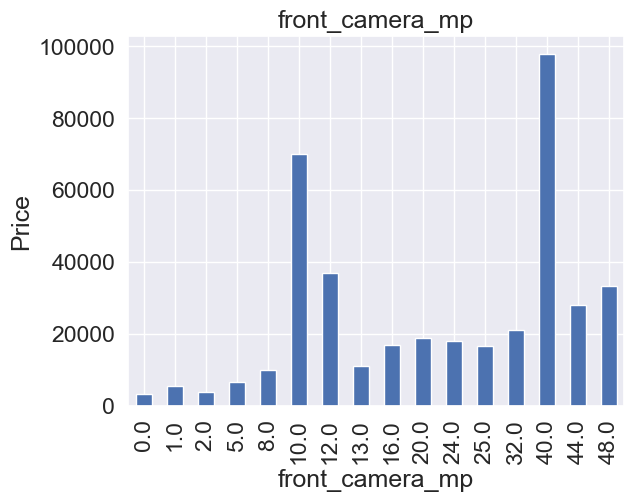

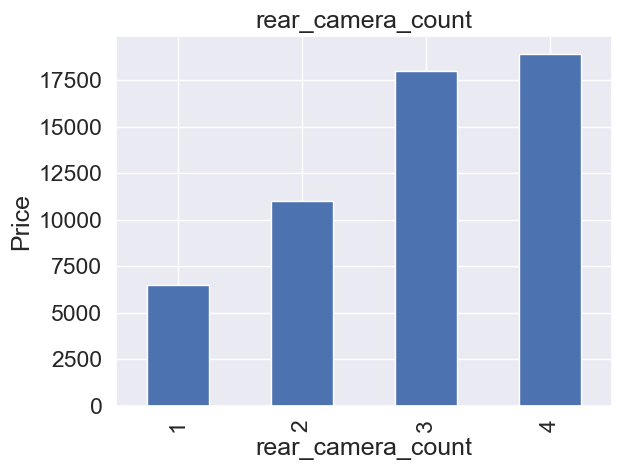

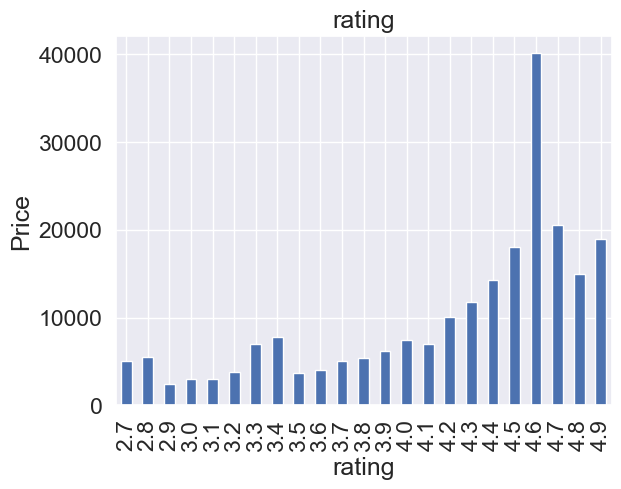

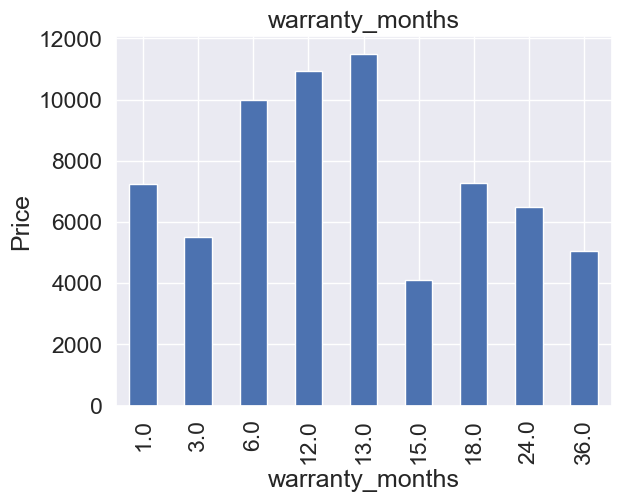

In [34]:
# Finding the relation b/w discrete vars and the dependent variable(Price)
for feature in discrete_var:
    data = df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

## Continous Features

In [35]:
cont_var = [feature for feature in numerical_features if feature not in discrete_var]
print(f'No_of_cont_var : {len(cont_var)}')

No_of_cont_var : 5


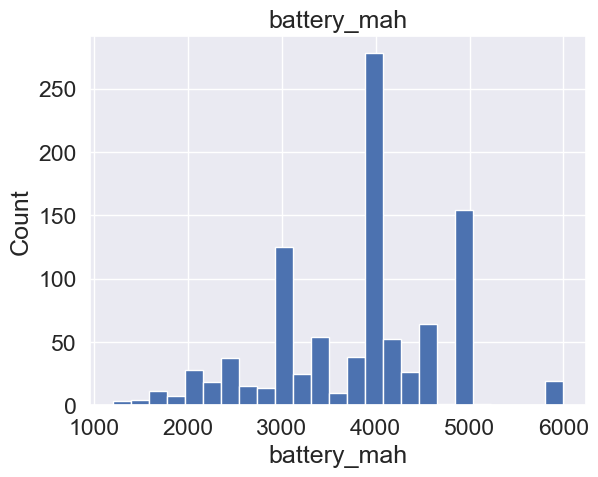

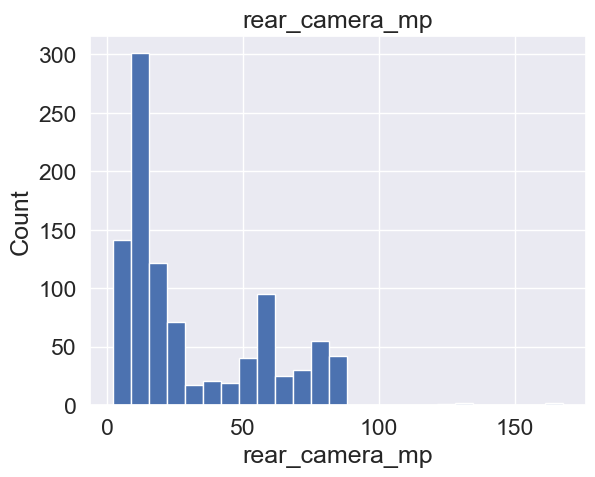

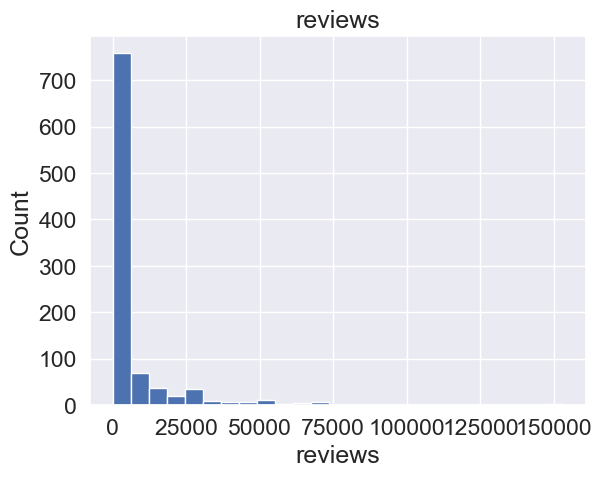

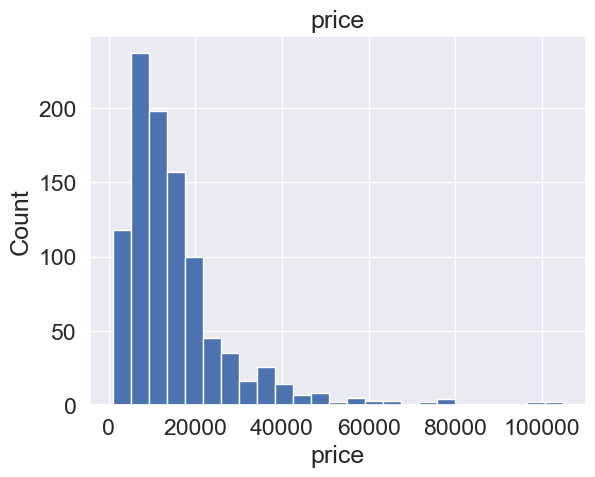

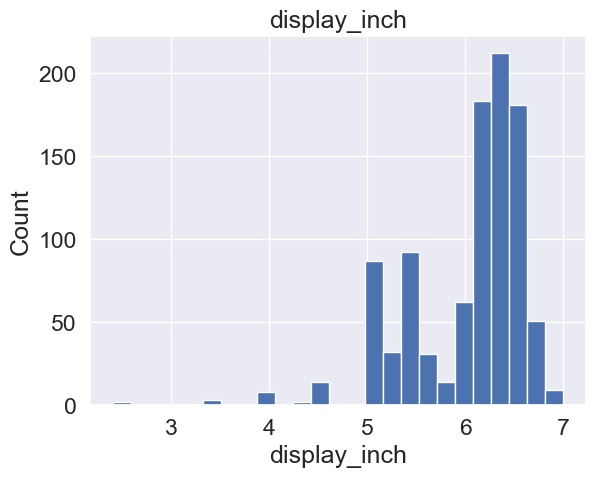

In [36]:
# Finding the dist of cont_values using histogram
for feature in cont_var:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Applying Log Transformations on cont features

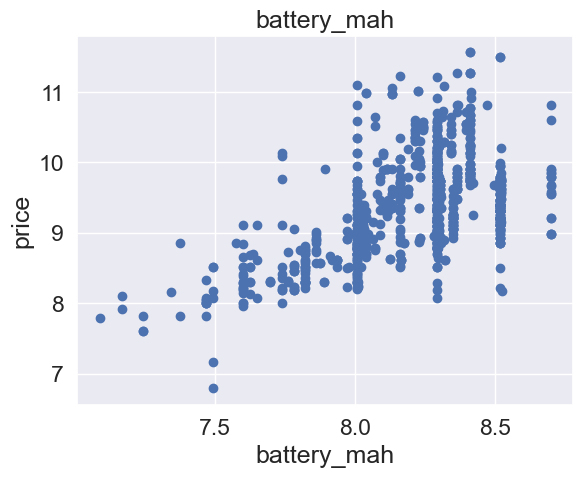

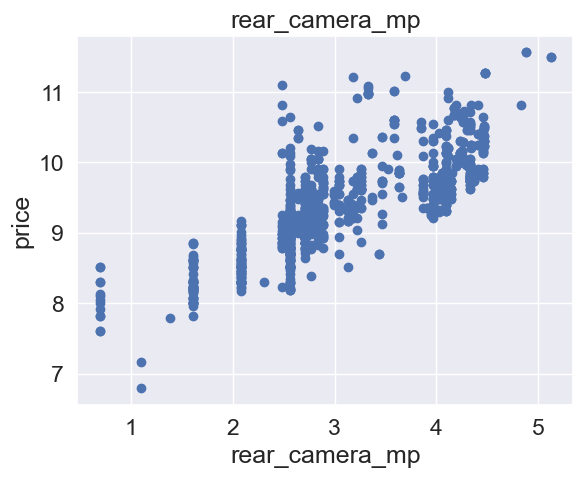

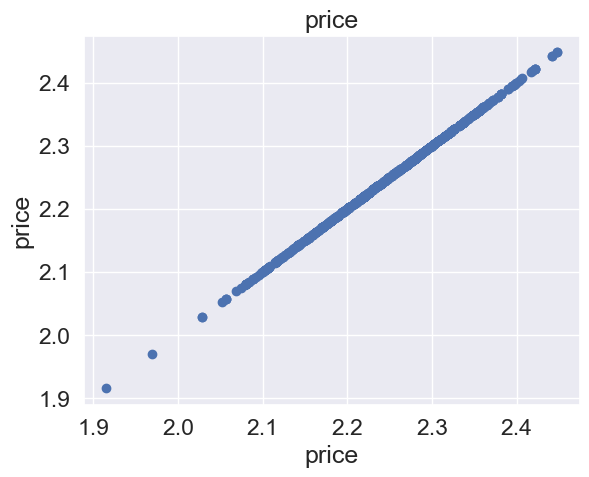

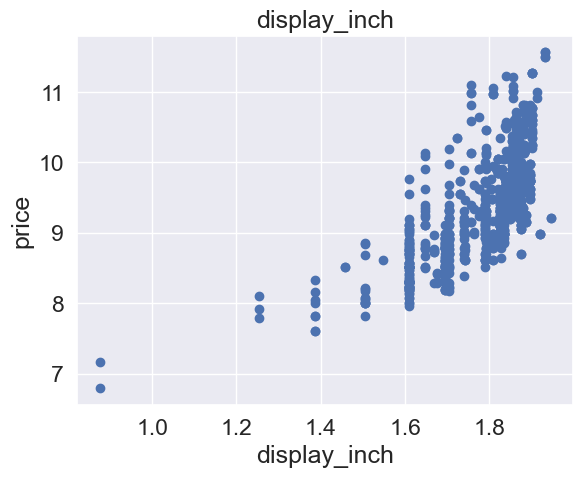

In [37]:
for feature in cont_var:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['price'] = np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()
# Applying log transformations on 0 creates (-inf) values and it breaks the model

## Outliers

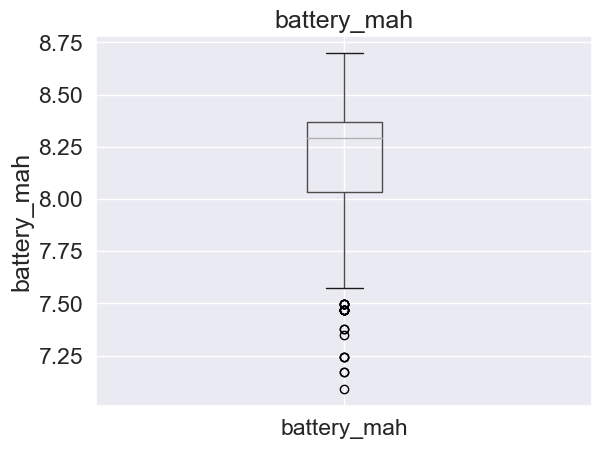

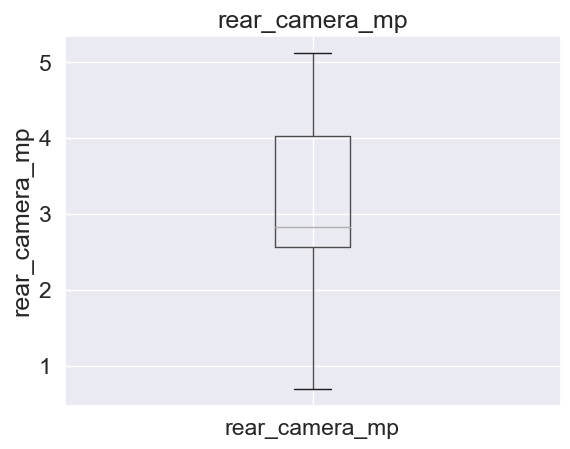

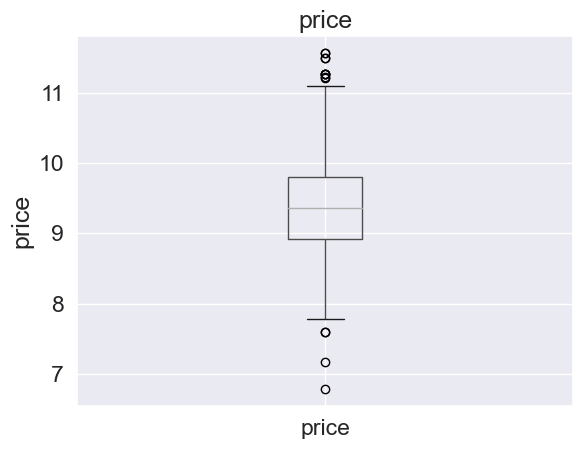

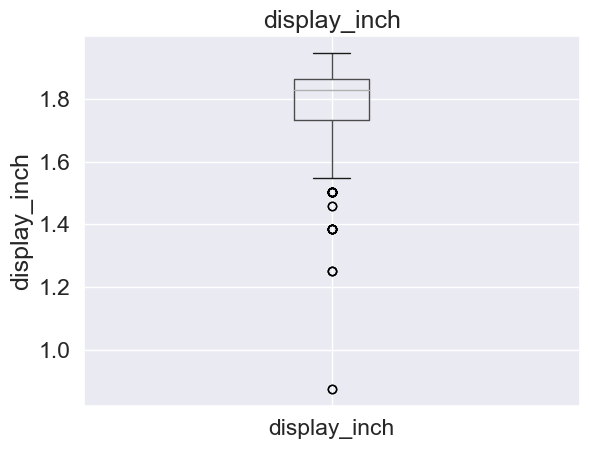

In [38]:
for feature in cont_var:
    data = df.copy()
    if 0 in df[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Features

In [39]:
cat_var = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(f'No of categorical features : {len(cat_var)}')

No of categorical features : 6


In [40]:
df[cat_var].head()

,brand,ram_gb,storage_gb,expandable_storage,battery_type,processor_family
0,Redmi,4 GB RAM,64 GB ROM,Expandable Upto 512 GB,standard battery,Snapdragon
1,Realme,4 GB RAM,64 GB ROM,NaN,standard battery,Snapdragon
2,Realme,4 GB RAM,128 GB ROM,NaN,standard battery,Snapdragon
3,Realme,4 GB RAM,128 GB ROM,NaN,standard battery,Snapdragon
4,Realme,3 GB RAM,32 GB ROM,Expandable Upto 256 GB,standard battery,Mediatek


In [41]:
for feature in cat_var:
    print(f'The feature is {feature} and no of categories are {len(df[feature].unique())}')

The feature is brand and no of categories are 54
The feature is ram_gb and no of categories are 12
The feature is storage_gb and no of categories are 10
The feature is expandable_storage and no of categories are 12
The feature is battery_type and no of categories are 15
The feature is processor_family and no of categories are 9


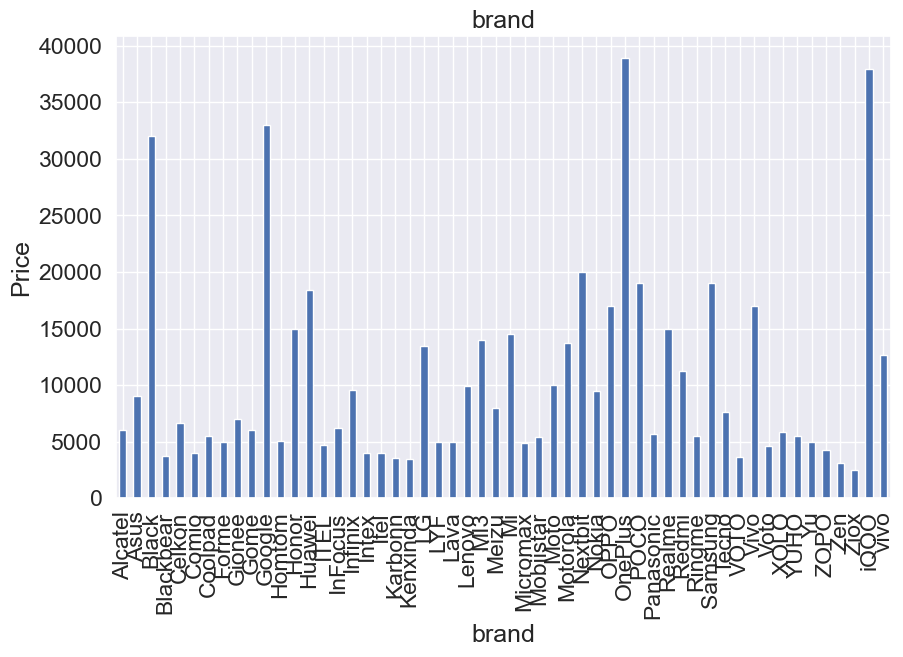

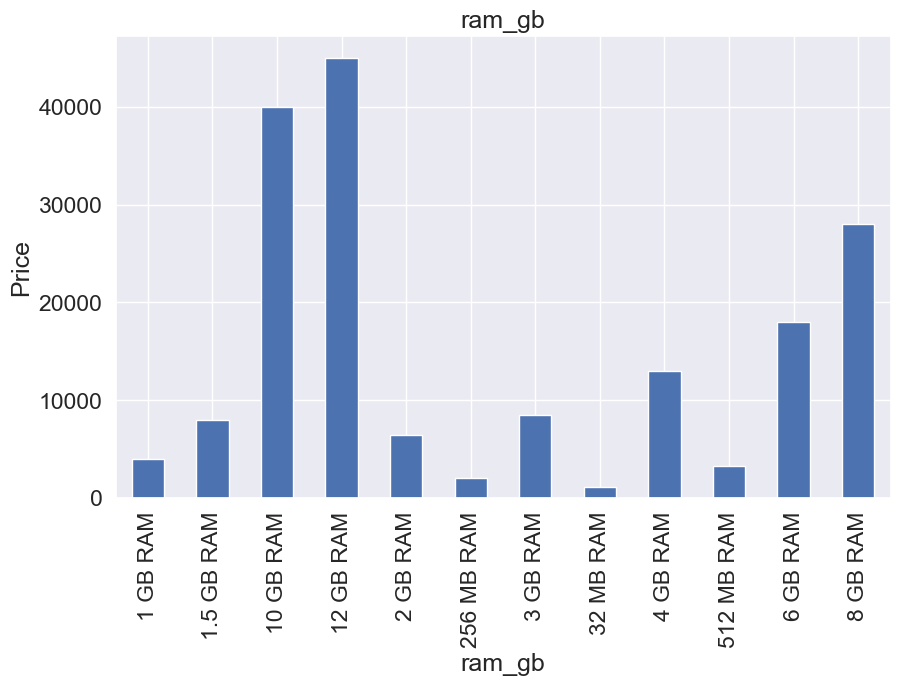

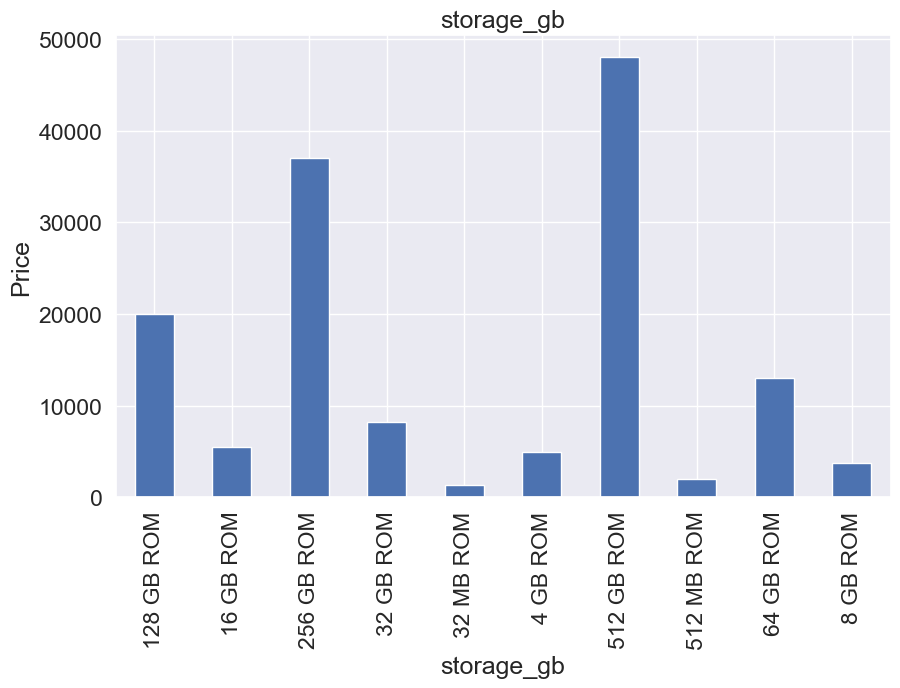

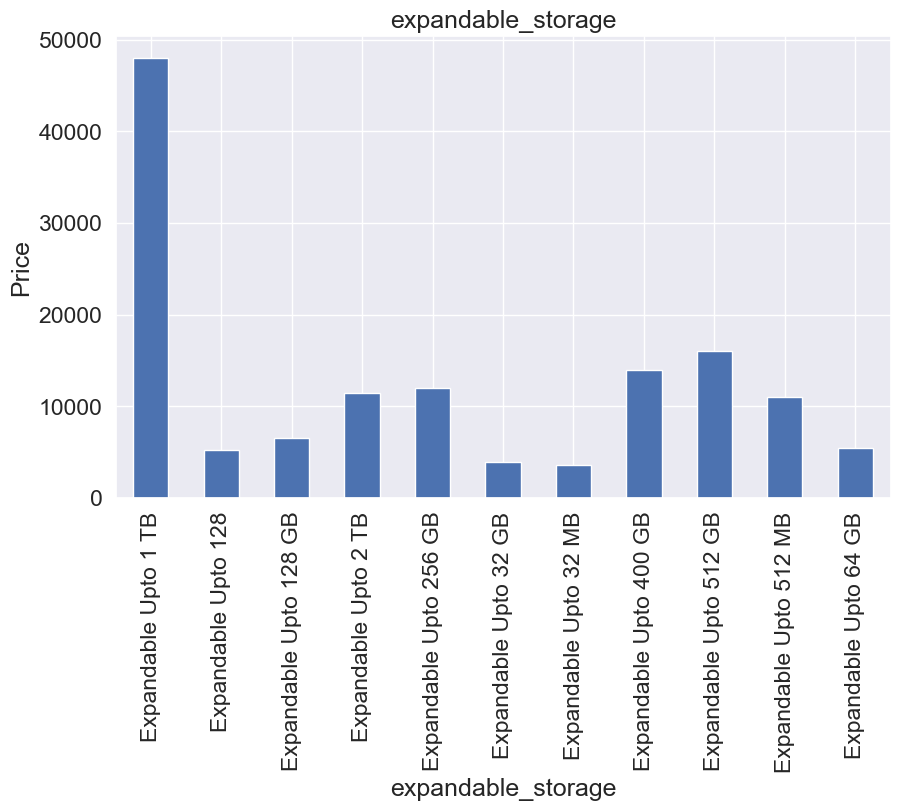

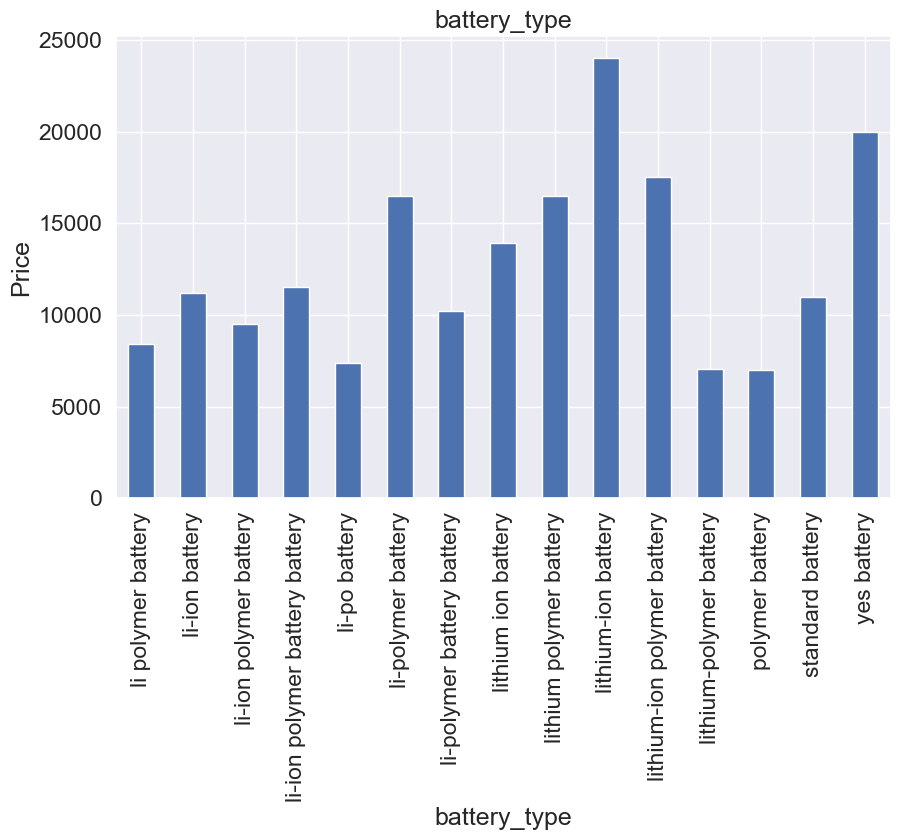

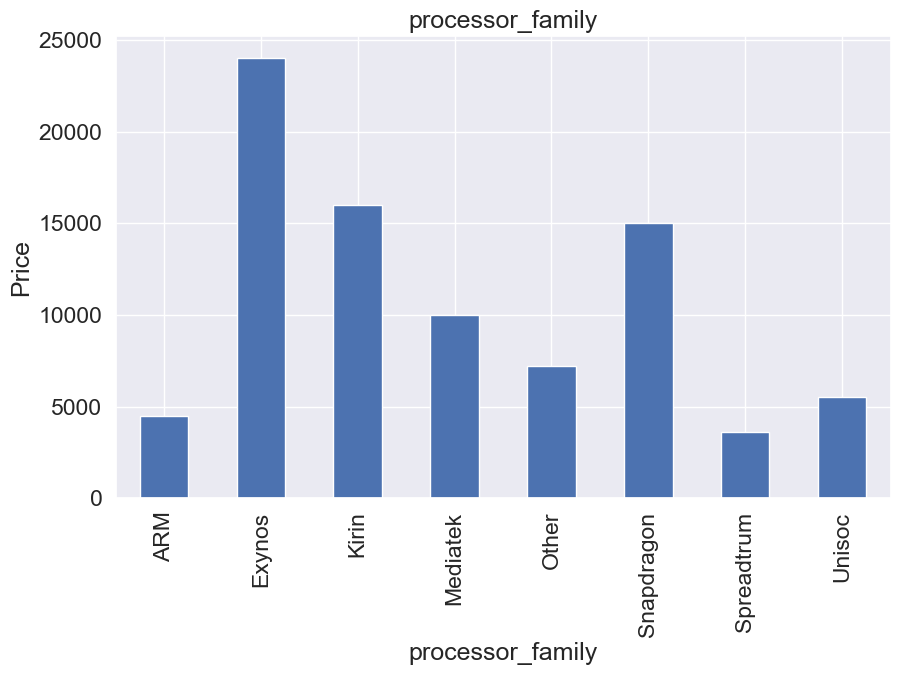

In [42]:
# Finding the relation b/w categorical features and dependent var(price)
for feature in cat_var:
    plt.figure(figsize=(10,6))
    data = df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

# Handling the missing values

### Categorical features (missing values)

In [44]:
cat_var_nan = [feature for feature in df.columns if df[feature].isna().sum() > 0 and df[feature].dtypes == 'O']

for feature in cat_var_nan:
    print(f'{feature} : {round(df[feature].isna().mean(),4)}% missing values')

expandable_storage : 0.253% missing values
processor_family : 0.1514% missing values


In [46]:
# Replacing the missing values with new label
def replace_cat_nan(df,cat_var_nan):
    data = df.copy()
    data[cat_var_nan] = data[cat_var_nan].fillna('Missing')
    return data

df = replace_cat_nan(df,cat_var_nan)

df[cat_var_nan].isna().sum()

expandable_storage    0
processor_family      0
dtype: int64

### Numerical features (missing values)

In [50]:
num_var_nan = [feature for feature in df.columns if df[feature].isna().sum() > 0 and df[feature].dtypes != 'O']

for feature in num_var_nan:
    print(f'{feature} : {round(df[feature].isna().mean(),4)}% missing values')

front_camera_mp : 0.0935% missing values
rating : 0.0132% missing values
reviews : 0.0132% missing values
warranty_months : 0.2124% missing values


In [51]:
# Replacing nan numerical values with median
for feature in num_var_nan:
    med_val = df[feature].median()

    df[feature + 'nan'] = np.where(df[feature].isna(),1,0)#to know where the missing values
    df[feature].fillna(med_val,inplace = True)

df[num_var_nan].isna().sum()

front_camera_mp    0
rating             0
reviews            0
warranty_months    0
dtype: int64

In [52]:
df.isna().sum()

brand                 0
ram_gb                0
storage_gb            0
expandable_storage    0
battery_type          0
battery_mah           0
rear_camera_mp        0
front_camera_mp       0
rear_camera_count     0
rating                0
reviews               0
price                 0
display_inch          0
processor_family      0
warranty_months       0
front_camera_mpnan    0
ratingnan             0
reviewsnan            0
warranty_monthsnan    0
dtype: int64

In [53]:
df.head()

,brand,ram_gb,storage_gb,expandable_storage,battery_type,battery_mah,rear_camera_mp,front_camera_mp,rear_camera_count,rating,reviews,price,display_inch,processor_family,warranty_months,front_camera_mpnan,ratingnan,reviewsnan,warranty_monthsnan
0,Redmi,4 GB RAM,64 GB ROM,Expandable Upto 512 GB,standard battery,5000.0,14,8.0,2,4.4,55078.0,9999,6.22,Snapdragon,12.0,0,0,0,0
1,Realme,4 GB RAM,64 GB ROM,Missing,standard battery,5000.0,24,8.0,4,4.5,20062.0,10999,6.52,Snapdragon,12.0,0,0,0,1
2,Realme,4 GB RAM,128 GB ROM,Missing,standard battery,5000.0,24,8.0,4,4.5,20062.0,11999,6.52,Snapdragon,12.0,0,0,0,1
3,Realme,4 GB RAM,128 GB ROM,Missing,standard battery,5000.0,24,8.0,4,4.5,20062.0,11999,6.52,Snapdragon,12.0,0,0,0,1
4,Realme,3 GB RAM,32 GB ROM,Expandable Upto 256 GB,standard battery,4000.0,15,5.0,2,4.4,10091.0,7499,6.10,Mediatek,12.0,0,0,0,1


# Final Data Cleaning and EDA Summary

### Data Cleaning & Preparation

### Missing Value Analysis

### Exploratory Data Analysis (EDA)

### Key Business Insights